In [2]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from ANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

<H1>Przygotowanie zbioru danych: XOR<H1>

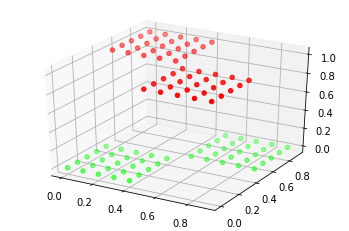

In [2]:
x = np.arange(0, 1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.logical_xor(dataX >= 0.5, dataY >= 0.5) 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

<H1>Utworzenie funkcji przynależności</H1>

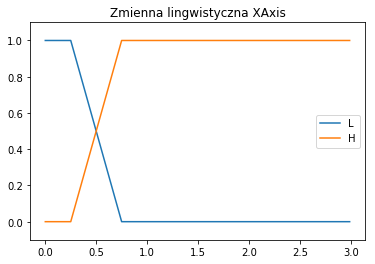

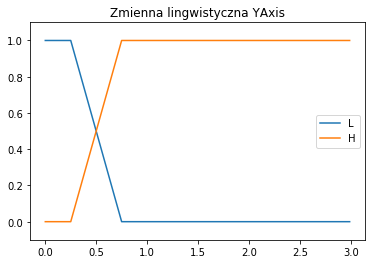

In [3]:
varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"]) # low, high
varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

#mf1 = [[-0.5, 0.25, 0.25, 0.25], [0.5, 0.25, 0.1, 0.1]]
#varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["L","H"])
#varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["L","H"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

<H1>Inicjalizacja systemu ANFIS</H1>

Parametry początkowe:
Przesłanki:  [[0.5, 0.5], [0.5, 0.5]] 
Konkluzje:  [[0.45112227 0.91967366 0.38804826]
 [0.13187115 0.27580724 0.57833449]
 [0.26337202 0.18054342 0.9423947 ]
 [0.0590144  0.19891131 0.02965764]]


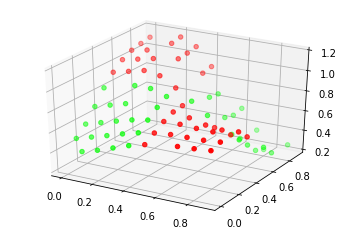

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

<H1>Uczenie systemu ANFIS</H1>

Optymalizacja zakończona!
z blędem:   2.4576642874868715e-07
Liczba ew:  42942
Liczba it:  50
TIME elapsed:  6.8228759765625


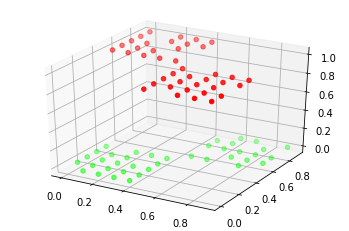

In [5]:
start = time.time()
fis.train(True, True, False, True, n_iter=50)
end = time.time()
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

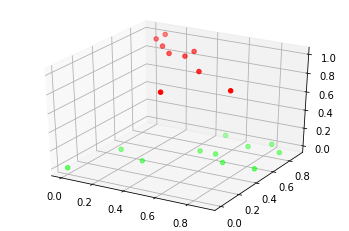

[[11  0]
 [ 0  9]]


In [6]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

<H1>Sprawdzanie parametrów jakich nauczył się system</H1>

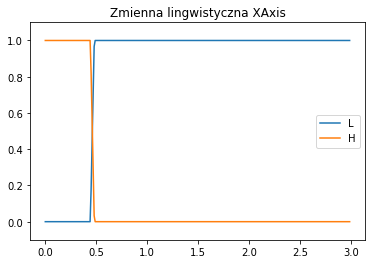

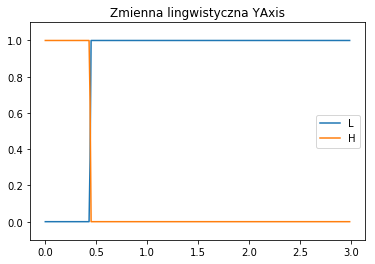

In [7]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

In [8]:
print("Parametry końcowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

Parametry końcowe:
Przesłanki:  [array([ 0.46231126, -0.03786492]), array([ 0.43935563, -0.00557579])] 
Konkluzje:  [[1.57717915e-12 1.59548099e-12 2.25453493e-12]
 [7.40715343e-08 1.55895451e-09 9.99999980e-01]
 [3.01777783e-09 1.53708918e-08 9.99999997e-01]
 [8.07805978e-13 6.94439897e-13 2.91327643e-12]]


<H1>Sprawdzanie wpływu parametrów na wyniki systemu</H1>

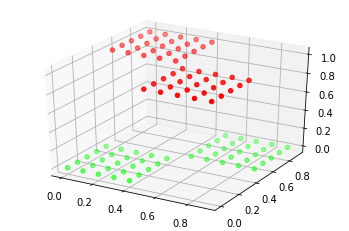

In [9]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

In [10]:
fis.premises = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

SyntaxError: invalid syntax (<ipython-input-10-3597d7f055b1>, line 1)

In [ ]:
fis.tsk = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

<H1>Zadanie</H1>

Naucz system ANFIS tabliczki mnożenia. Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4 ...). Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki. Zrób wykres wymiaru tabliczki od czasu uczenia i wyślij wraz ze swoim komentarzem na maila iperenc@kis.p.lodz.pl. Nie musisz dojść do rozmiaru 10x10, ważne żeby było widać jaka jest zależność.

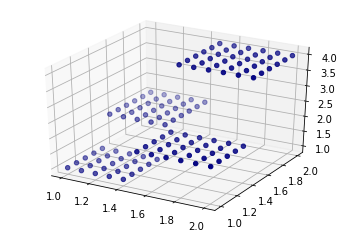

In [11]:
x = np.arange(1, 2.01, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()

dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.multiply(np.round(dataX), np.round(dataY))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[0,0,0.5] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

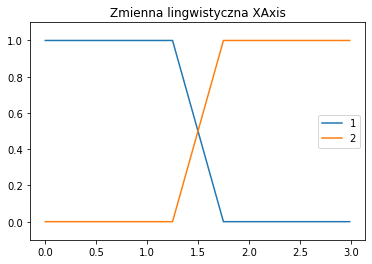

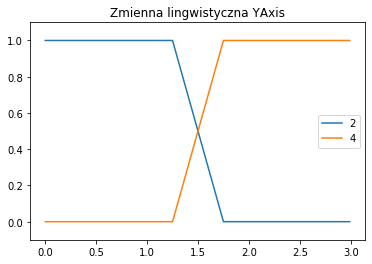

In [12]:
varX = FuzzyInputVariable_2Trapezoids(1.5, 0.5, "XAxis", ["1","2"]) # low, high
varY = FuzzyInputVariable_2Trapezoids(1.5, 0.5, "YAxis", ["2","4"])


#mf1 = [[0.5, 1, 0, 0.5], [2, 0.25, 0.1, 0.1]]
#varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["L","H"])
#varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["L","H"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()



plt.show()

Parametry początkowe:
Przesłanki:  [[1.5, 0.5], [1.5, 0.5]] 
Konkluzje:  [[0.75039316 0.7197847  0.71339472]
 [0.7493068  0.28713396 0.16626045]
 [0.59943805 0.06644301 0.6423869 ]
 [0.78109239 0.64980895 0.8343572 ]]


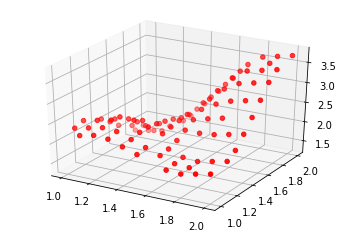

In [13]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

Optymalizacja zakończona!
z blędem:   3.428580231120452
Liczba ew:  53044
Liczba it:  50
TIME elapsed:  8.00842022895813


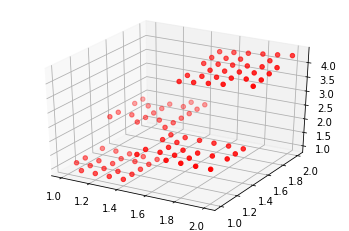

In [14]:
start = time.time()
fis.train(True, True, False, True, n_iter=50)
end = time.time()
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

#Dla macierzy 2x2 wykonuje się średnio 8 sekund. 
#Większych macierzy nie zrobiono.


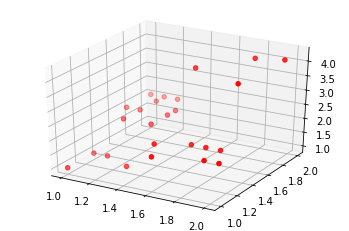

[[ 4  0  0]
 [ 0 17  0]
 [ 0  0  4]]


In [15]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

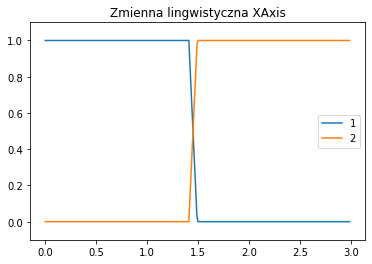

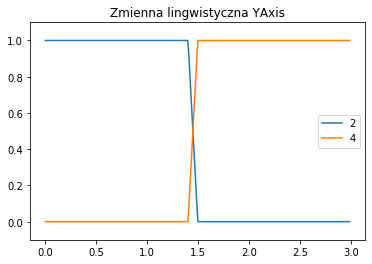

In [16]:
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

In [17]:
print("Parametry końcowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

Parametry końcowe:
Przesłanki:  [array([1.45123529, 0.08186876]), array([1.45012601, 0.09545   ])] 
Konkluzje:  [[0.00000000e+00 3.15899202e-07 9.99999706e-01]
 [9.96287901e-07 3.88786382e-08 1.99999839e+00]
 [1.26844703e-16 3.08347761e-07 1.99999940e+00]
 [5.71427837e-01 5.71429174e-01 2.00000000e+00]]


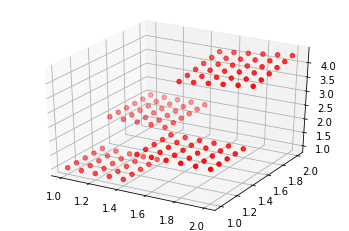

In [18]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

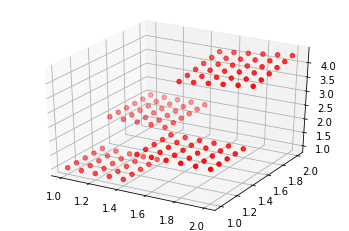

In [19]:
#fis.premises = [1.45123529, 0.08186876], [1.45012601, 0.09545   ]
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

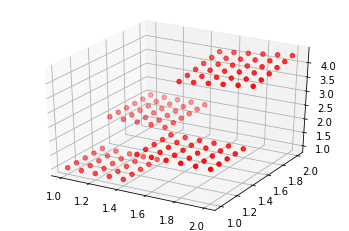

In [20]:
#fis.tsk = [[0.00000000e+00 3.15899202e-07 9.99999706e-01],
 [9.96287901e-07 3.88786382e-08 1.99999839e+00],
 [1.26844703e-16 3.08347761e-07 1.99999940e+00],
 [5.71427837e-01 5.71429174e-01 2.00000000e+00]]
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

In [ ]:
XD%matplotlib auto

In [ ]:
%matplotlib inline